Please upload the 'forest.csv' file:


Saving forest.csv to forest.csv

Cluster Summary (Mean Values):
                X         Y     month       FFMC         DMC          DC  \
cluster                                                                    
0        4.229508  4.088525  8.380328  92.255410  124.816721  656.143279   
1        5.715596  4.733945  8.458716  90.556881  147.961468  660.971560   
2        4.864078  4.466019  3.757282  85.967961   30.331068  107.916505   

               ISI       temp         RH      wind      rain       area  
cluster                                                                  
0        10.363607  22.171803  37.121311  3.538689  0.000000  16.026393  
1         8.518349  16.079817  63.504587  4.714679  0.100917  10.863303  
2         5.580583  12.141748  45.174757  4.698058  0.001942   5.533010  


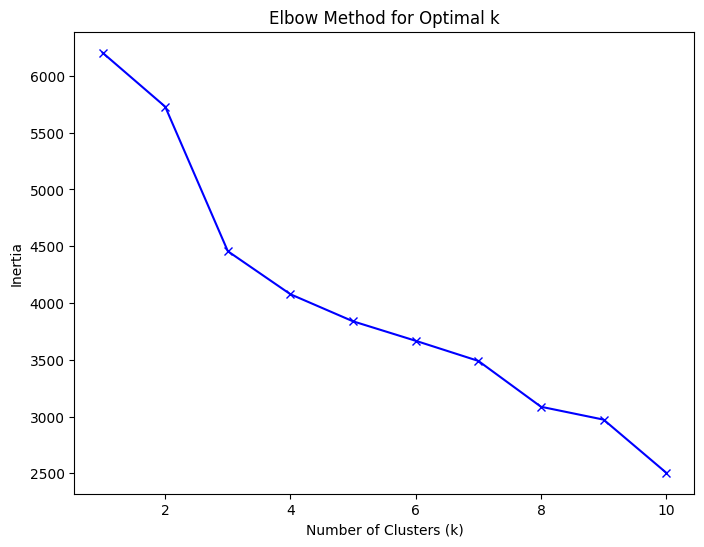

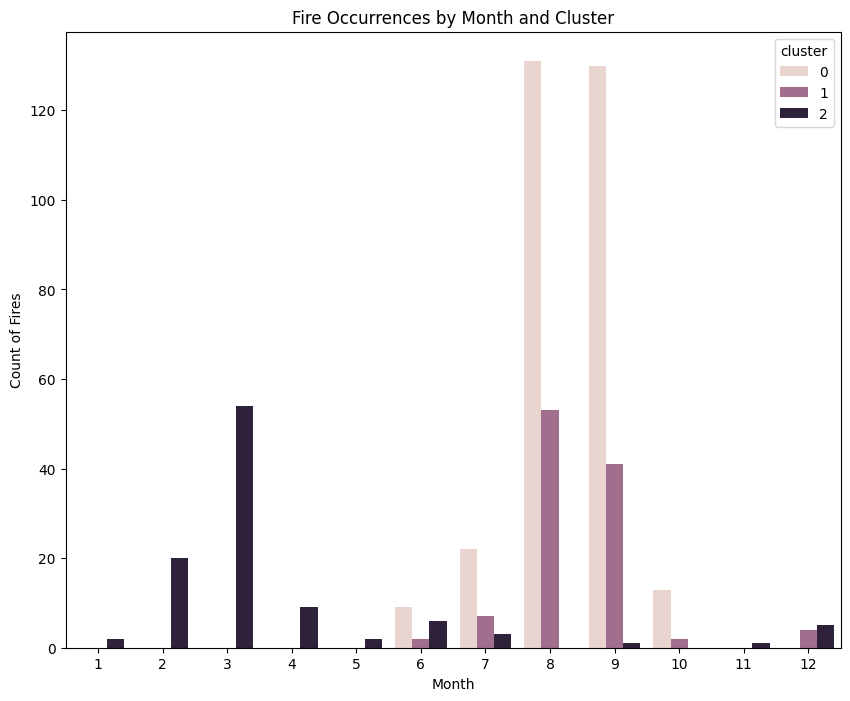

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



The input fire instance belongs to Cluster 0.

Characteristics of this cluster (mean values):
X          4.229508
Y          4.088525
month      8.380328
FFMC      92.255410
DMC      124.816721
DC       656.143279
ISI       10.363607
temp      22.171803
RH        37.121311
wind       3.538689
rain       0.000000
area      16.026393
Name: 0, dtype: float64
This cluster represents moderate-severity fire hotspots.


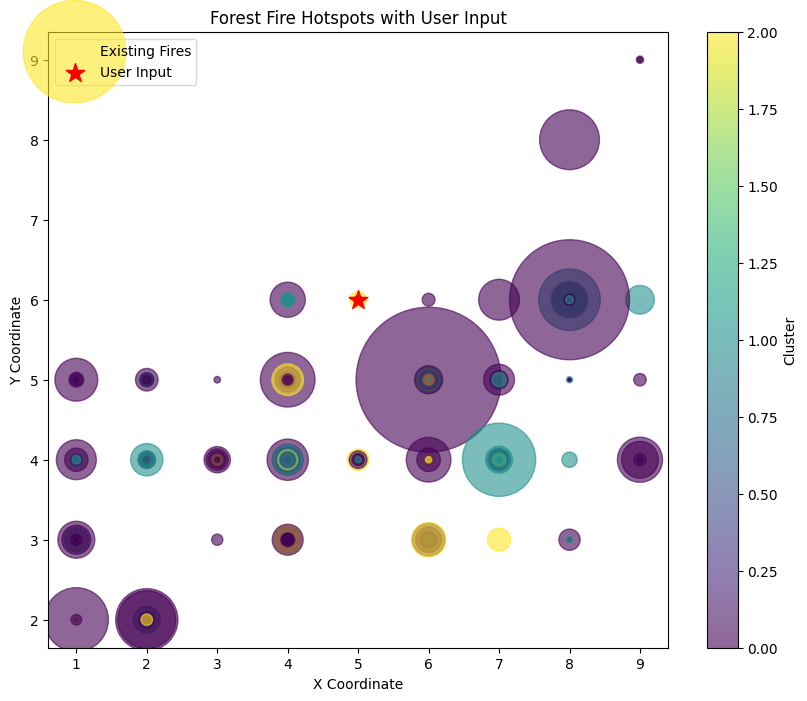


Cluster summary saved as 'cluster_summary.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
%matplotlib inline

# Upload the dataset
print("Please upload the 'forest.csv' file:")
uploaded = files.upload()

# Load the dataset
try:
    df = pd.read_csv(io.BytesIO(uploaded['forest.csv']))
except KeyError:
    print("Error: 'forest.csv' not uploaded. Please upload the correct file.")
    exit()

# Data preprocessing
# Convert month and day to numerical values
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
             'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month'] = df['month'].map(month_map)
day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
df['day'] = df['day'].map(day_map)

# Select relevant features for clustering
features = ['X', 'Y', 'month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
X = df[features]

# Handle missing or invalid values
X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Cluster summary
cluster_summary = df.groupby('cluster').mean()
print("\nCluster Summary (Mean Values):")
print(cluster_summary[features])

# Elbow curve for optimal k
inertia = []
K = range(1, 11)
for k in K:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_scaled)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Monthly fire occurrences by cluster
plt.figure(figsize=(10, 8))
sns.countplot(x='month', hue='cluster', data=df)
plt.xlabel('Month')
plt.ylabel('Count of Fires')
plt.title('Fire Occurrences by Month and Cluster')
plt.show()

# Form for user input
#@title Input Fire Instance Details
X_coord = 5 #@param {type:"number"}
Y_coord = 6 # @param {"type":"number","placeholder":"6.5"}
month = "aug"  #@param ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
FFMC = 92.4  #@param {type:"number"}
DMC = 117.9  #@param {type:"number"}
DC = 668  #@param {type:"number"}
ISI = 12.2  #@param {type:"number"}
temp = 19  #@param {type:"number"}
RH = 34  #@param {type:"number"}
wind = 5.8  #@param {type:"number"}
rain = 0.05  #@param {type:"number"}
area = 69.79  #@param {type:"number"}

# Validate user input
try:
    if not (1 <= X_coord <= 9 and 1 <= Y_coord <= 9):
        raise ValueError("X and Y coordinates must be between 1 and 9.")
    if not (0 <= FFMC <= 100 and 0 <= DMC <= 300 and 0 <= DC <= 1000 and 0 <= ISI <= 50):
        raise ValueError("Fire indices out of realistic range.")
    if not (0 <= temp <= 40 and 0 <= RH <= 100 and 0 <= wind <= 20 and 0 <= rain <= 10):
        raise ValueError("Weather parameters out of realistic range.")
    if not (0 <= area <= 1000):
        raise ValueError("Area burned must be between 0 and 1000 ha.")

    # Map month to numerical value
    month_num = month_map[month]

    # Create user input array
    user_input = [X_coord, Y_coord, month_num, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area]

    # Predict cluster
    user_input_scaled = scaler.transform([user_input])
    cluster = kmeans.predict(user_input_scaled)[0]

    # Display results
    print(f"\nThe input fire instance belongs to Cluster {cluster}.")
    print("\nCharacteristics of this cluster (mean values):")
    print(cluster_summary.loc[cluster][features])

    # Interpretation of the cluster
    cluster_area = cluster_summary.loc[cluster]['area']
    if cluster_area > 50:
        print("This cluster represents high-severity fire hotspots (large burned area).")
    elif cluster_area > 10:
        print("This cluster represents moderate-severity fire hotspots.")
    else:
        print("This cluster represents low-severity or no-fire areas.")

    # Visualize the input point with existing clusters
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(df['X'], df['Y'], c=df['cluster'], cmap='viridis',
                         s=df['area']*10, alpha=0.6, label='Existing Fires')
    plt.scatter(X_coord, Y_coord, c='red', s=200, marker='*',
                label='User Input')
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Forest Fire Hotspots with User Input')
    plt.legend()
    plt.show()

    # Save cluster summary
    cluster_summary.to_csv('cluster_summary.csv')
    print("\nCluster summary saved as 'cluster_summary.csv'.")
    files.download('cluster_summary.csv')

except ValueError as e:
    print(f"Error: {e}")